# Аналитика продаж игры интернет-магазина «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель исследования:** 

Изучить данные о продажах интернет-магазина «Стримчик» для дальнейшего прогнозирования рынка компьютерных игры в 2017 году


**Ход исследования:**


1) Загрузка датафремйма

2) Преодбработка данных: 

- поиск дубликатов

- приведение столбцов к змеиному регистру

- перобразование типов данных в столбцах

- удаление/обработка пропущенных значений

3) Исследовательский анализ данных:

- выпуска игр по годам

- изменение продаж по платформам

- лидеры роста/падения

- влияние отзывов критиков и пользователей на продажи

- распределние игр по жанрам

4) Описание портрета пользователей из разных регионов (популярные платформы, жанры, возрастной рейтинг игр)

5) Проверка гипотез:

- ГИПОТЕЗА 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- ГИПОТЕЗА 2. Средние пользовательские рейтинги жанров Action и Sports разные

In [1]:
#импортируем необходимые библиотеки, выставялем параметры для отображения таблиц
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None)

#### Загрузка данных

##### Загрузка и сохранение датафрейма

In [2]:
#загружаем и сохраняем датафрейм
games = pd.read_csv('/datasets/games.csv', sep=',')

##### Первоначальный анализ датафреймов

In [3]:
#отображаем 10 случайных строк датафрейма
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10528,Kirarin * Revolution: Mezase! Idol Queen,DS,2007.0,Simulation,0.00,0.00,0.10,0.00,NaN,NaN,NaN
15266,Shippuu Mahou Daisakusen: Kingdom-Grandprix,SAT,1996.0,Shooter,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1249,The Simpsons Game,PS2,2007.0,Action,0.35,0.03,0.00,1.13,68.0,8.2,T
2859,Battlefield: Bad Company 2,PC,2010.0,Shooter,0.19,0.53,0.00,0.00,87.0,8.3,M
1687,FIFA Soccer 11,PSP,2010.0,Sports,0.13,0.69,0.01,0.36,68.0,5.4,E
5489,Way of the Samurai 2,PS2,2003.0,Action,0.05,0.04,0.23,0.01,59.0,9,M
6067,Neopets Puzzle Adventure,DS,2008.0,Puzzle,0.26,0.00,0.00,0.02,70.0,tbd,E
7105,Saint Seiya: Sanctuary Battle,PS3,2011.0,Action,0.00,0.09,0.11,0.02,62.0,7.3,NaN
16538,Shin Sangoku Musou 4 Special,X360,2005.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15376,Back to the Future: The Game,X360,2015.0,Adventure,0.02,0.00,0.00,0.00,NaN,7.5,NaN


In [4]:
#выводим данные по датафрейму
print(games.info())
games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

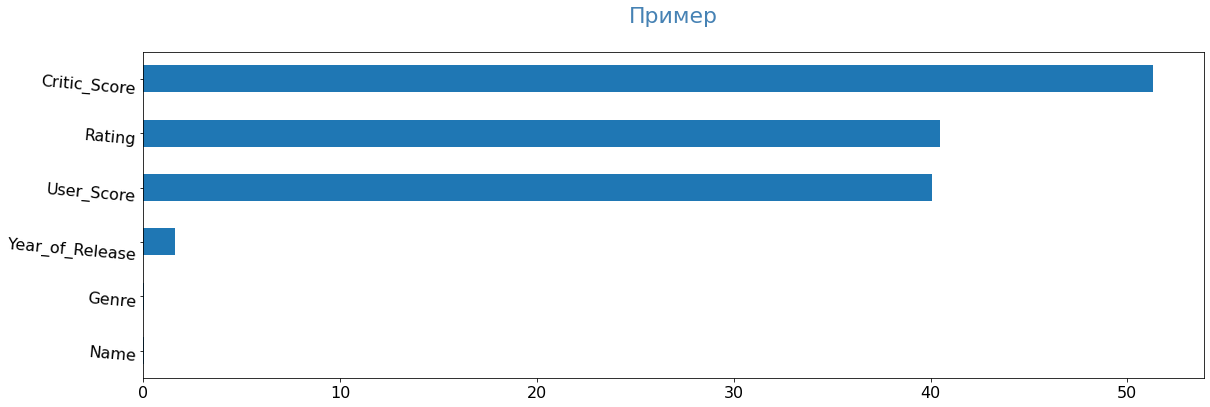

In [6]:
pass_value_barh(games)

На этапе загрузки данных был загружен датафрейм, содержащий информацию о продажах компьютерных игры и сохранен в переменной `games`.

Датафрейм содержит 11 столбцов:

- `Name` — название игры. Тип данных `object`. Содержит 2 пропуска
- `Platform` — платформа. Тип данных `object`. Не содержит пропусков
- `Year_of_Release` — год выпуска. Тип данных `float64`. Содержит 269 пропусков
- `Genre` — жанр игры. Тип данных `object`. Содержит 2 пропуска
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий). Тип данных `float64`. Не содержит пропусков.
- `EU_sales` — продажи в Европе (миллионы проданных копий). Тип данных `float64`. Не содержит пропусков.
- `JP_sales` — продажи в Японии (миллионы проданных копий). Тип данных `float64`. Не содержит пропусков.
- `Other_sales` — продажи в других странах (миллионы проданных копий). Тип данных `float64`. Не содержит пропусков.
- `Critic_Score` — оценка критиков (максимум 100). Тип данных `float64`. Содержит 8578 пропусков.
- `User_Score` — оценка пользователей (максимум 10). Тип данных `object`. Содержит 6701 пропуск.
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Тип данных `object`. Содержит 6766 пропусков.

#### Предобработка данных

##### Приведение названия столбцов к "змеиному" регистру

In [9]:
# приводим все буквы в названиях колонок к строчному регистру
games.columns = games.columns.str.lower()

In [10]:
# проверяем результат
list(games)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

##### Поиск дубликатов

Для начала поищим полные дубликаты в датафрейме

In [11]:
games.duplicated().value_counts()

False    16715
dtype: int64

Полные дубликаты в датафрейме отсутствуют

##### Преобразование типов данных в столбцах, заполненние/удаление пропущенных значений

###### Столбец `name`

In [15]:
# столбец `name` содержит 2 пропущенных значения. удалим эти строки
games = games.dropna(subset = ['name'])

Пропущенные значения могли образроваться как при заполнении данных (человеческий фактор), так и при выгрузке (техническая ошибка).

###### Столбец `year_of_release`

In [16]:
# применим  метод .describe() и выясним, за какой период были выпущены компьютерные игры
games['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Датафрейм содержит информацию об играх, выходивших на разных платформах. Попрубем заменить пропуски в годах минимальным значениием года выхода игр на других платформах

In [17]:
# на всякий случай посмотрим, сколько дубликатов по столбцу name
games.duplicated('name').value_counts()

False    11559
True      5154
dtype: int64

In [18]:
# проведем замену пропусков на основании минимального значения года выпуска игры на другой платформе
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('min'))

In [19]:
games['year_of_release'].isna().value_counts()

False    16567
True       146
Name: year_of_release, dtype: int64

Осталось всего 146 строк с пропущенным годом выхода. Посмотрим, на сколько это популярные игры и на сколько сильно их удаление повлияет на анализ датасета

In [20]:
print('Продажи в Северной Америке более 1 млн.копий')
print(games.loc[(games['year_of_release'].isna())&(games['na_sales'] >1)])
print('Продажи в Европе более 1 млн.копий')
print(games.loc[(games['year_of_release'].isna())&(games['eu_sales'] >1)])
print('Продажи в Европе более 200 тыс.копий')
print(games.loc[(games['year_of_release'].isna())&(games['jp_sales'] >0.2)])

Продажи в Северной Америке более 1 млн.копий
                                          name platform  year_of_release  \
475                 wwe Smackdown vs. Raw 2006      PS2              NaN   
627                                  Rock Band     X360              NaN   
657   Frogger's Adventures: Temple of the Frog      GBA              NaN   
805                                  Rock Band      Wii              NaN   
1506                                 Adventure     2600              NaN   
1585                                    Combat     2600              NaN   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
475    Fighting      1.57      1.02       0.0         0.41           NaN   
627        Misc      1.93      0.33       0.0         0.21          92.0   
657   Adventure      2.15      0.18       0.0         0.07          73.0   
805        Misc      1.33      0.56       0.0         0.20          80.0   
1506  Adventure      1.21      0.08       

Всего 6 игры с сумарными продажам более 1 млн.копий в Северной Америке (При этом только 1 игра с таким же показателем в Европе). Удаление этих игры не окажут существенного влияния на анализ датасета.

Таким образом, датафрейм содержит инофрмация об играх, выпущенные в период с 1980 года по 2016. Столбец `year_of_release` после обработки ссодержит 146 пропусков. Поскольку информация о годе выпуска нам понадобится в дальнейшем для анализа, а так же такие игры не являются сверх успешными, удалим эти строки как несущественные.

In [21]:
# удалим строки с пропущенными значениями в столбце
games = games.dropna(subset = ['year_of_release'])

In [22]:
# приведем столбцем к целочисленному формату
games['year_of_release'] = games['year_of_release'].astype(int)

Пропущенные значения могли образроваться как при заполнении данных (человеческий фактор), так и при выгрузке (техническая ошибка).

###### Столбец `genre`

In [23]:
# столбец `genre` содержит 2 пропущенных значения. удалим эти строки
games = games.dropna(subset = ['genre'])

Пропущенные значения могли образроваться как при заполнении данных (человеческий фактор), так и при выгрузке (техническая ошибка).

###### Столбец `critic_score`

Столбец `critic_score` содержит оценку из 100 возможных баллов. Столбец отформатирован в десятичных дробях. Столбец содержит 8578 пропущенных значений, которые мы не можем заполнить. Удалениие такого количсетва строк так же невозможно. Оставим все как есть.

In [24]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Наиболее вероятная причина образования пропусков - человеческий фактор (для игры отсутсвует информация об оценке критиков).

###### Столбец `user_score`

Столбец `user_score` содержит дробную оценку из 10 возможных баллов. Столбец отформатирован в формате `object`. Столбец содержит 6701 пропущенных значений, которые мы не можем заполнить. Удалениие такого количсетва строк так же невозможно.

In [25]:
# посмотрим на значения в столбце
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке значений присутсвует значение `tbd`. Предположительно, данная аббревиатура означет, что пользователям только предстоить поставить игре оценку (от английского "to be determine" - будет определено).

In [26]:
# заменим значение 'tbd' на пропущенное значение 'Nan'
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [27]:
# преобразуем тип данных в числовой
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [28]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Наиболее вероятная причина образования пропусков - человеческий фактор (для игры отсутсвует информация об оценке игроков).

###### Столбец `rating`

Столбец `rating` содержит информацию о возрастном рейтинге игры. Столбец отформатирован в формате `object`. Столбец содержит 6766 пропущенных значений, которые мы не можем заполнить. Удалениие такого количсетва строк так же невозможно. Оставим все как есть.

In [29]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Наиболее вероятная причина образования пропусков - человеческий фактор (для игры отсутсвует информация возрастном рейтинге игры).

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Анализ представленных значений и поиск в интернет информации позволяет нам более полно описать представленные значения.

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. 
- nan - пропущенное категоральное значение
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- «К-А» ("Kids to Adults") - "Дети и взрослые": Игры подходят для всех возрастов.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. 
- «RP» ("Rating Pending") - "Оценка в ожидании": оценка еще не проставлена.

In [30]:
games.rating.value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Для упрощения анализа, призведем категоризацию ретингов:

"all" - игры для всех возрастов. Включает в себя: E, K-A
"n/a" - рейтинг отсутсвует. Включает в себя: RP, nan
"kids" - игры для детей. Включает в себя: EC
"teens" - игры для среднего возраста. Включает в себя: T, E10+
"adults" - игры для взрослых. Включает в себя: AO, M

In [31]:
#применим новые категоральные значения колонки rating к играм
games.loc[games['rating'].isin(['K-A', 'E']), 'rating'] = 'all'
games.loc[games['rating'] == 'RP', 'rating'] = 'n/a'
games.loc[games['rating'].isna(), 'rating'] = 'n/a'
games.loc[games['rating'] == 'EC', 'rating'] = 'kids'
games.loc[games['rating'].isin(['T', 'E10+']), 'rating'] = 'teens'
games.loc[games['rating'].isin(['AO', 'M']), 'rating'] = 'adults'

In [32]:
games.rating.value_counts()

n/a       6701
teens     4342
all       3961
adults    1555
kids         8
Name: rating, dtype: int64

##### Столбец с суммарным продажами по все регионам

In [33]:
# добавим столбец total_sales, содержащий сумму продаж по 4м столбцам (na, eu, jp и other)
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [34]:
# проверим результат
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11237,FIFA 12,PS2,2011,Sports,0.00,0.02,0.00,0.06,NaN,NaN,n/a,0.08
1738,Destruction Derby 2,PS,1996,Racing,0.65,0.44,0.00,0.08,NaN,NaN,n/a,1.17
905,Need for Speed: Shift,X360,2009,Racing,0.73,0.96,0.01,0.22,83.0,6.5,all,1.92
1980,Virtua Tennis 3,PS3,2007,Sports,0.23,0.58,0.03,0.21,80.0,7.9,all,1.05
3355,BeatMania Append 3rdMix,PS,1998,Simulation,0.00,0.00,0.56,0.04,NaN,NaN,n/a,0.60
4114,NFL Xtreme 2,PS,1999,Sports,0.27,0.18,0.00,0.03,NaN,NaN,n/a,0.48
5004,NCAA Football 11,PS2,2010,Sports,0.19,0.15,0.00,0.05,NaN,NaN,all,0.39
7326,The Bard's Tale,PS2,2004,Role-Playing,0.10,0.08,0.00,0.03,76.0,8.6,teens,0.21
8916,SNK Arcade Classics Vol. 1,PSP,2008,Misc,0.13,0.00,0.01,0.01,68.0,NaN,teens,0.15
11727,Vietcong: Purple Haze,XB,2004,Shooter,0.06,0.02,0.00,0.00,57.0,8.4,adults,0.08


In [35]:
# проверим датафрейм после всех преобразований
print(games.info())
games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         9027
rating                0
total_sales           0
dtype: int64

В ходе предобработки данных были выполнены следующие действия:

- названия столбцов приведены в "змеиный" регистр

- удалены строки с пропущенным значениями в столбцах `name`,  `genre`

- часть пропущенных значений из столбца `year_of_release` были восстановлены за счет информаации о выходе игр на других платформах, остальные строки были проверены на существенность и отброшены

- столбец `year_of_release` приведен к целочисленному формату

- добавлен столбец `total_sales`, содержащий информацию о суммарных продажах по всему миру

- столбец `rating` был переработан в новые агрегированные категоральные значения

- пропущенные значения столбцов `critic_score` и `user_score`  оставлены без изменения, т.к. заполнить их нечем, а удаление строк с пропущенными значениями не представляется возможным в виду большого объема данных

- в ходе предобработки данных было удалено 148 строк

In [36]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


#### Исследовательский анализ данных

##### Выпуск игр по годам

Ранее было выяснено, что датафрейм содержит игры, выпущенные с 1980 по 2016 годы.

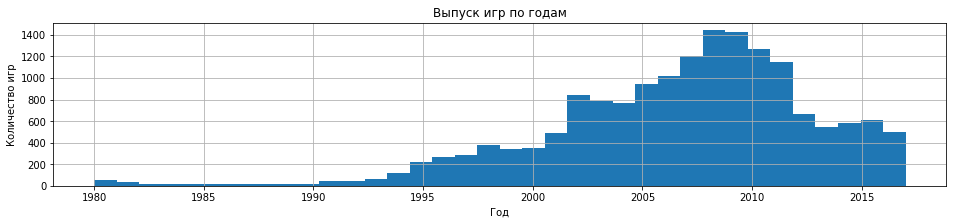

In [37]:
#строим гистограмму по столбцу year_of_release
games['year_of_release'].hist(figsize=(16,3), range=(1980, 2017), bins=36);
plt.title('Выпуск игр по годам');
plt.xlabel('Год');
plt.ylabel('Количество игр');

До 1995 было выпущено незначительное колиечство игры. Пик производства игр пришелся на период с 2006 по 2012 годы. В 2013 произошло рекзкое падание продаж игр и вплоть до 2016 года объем рынка практически не менялся. Стоит отметить, что продажи в 2016 году сопостовим по объему с продажими в другие годы пдаения. Однако, данные за 2016 - неполные. Таким образом, по результатм 2016 года следует ожидать рост рынка.

##### Продажи по платформам

Объявим новую переменную top_platforms, содержащую информацию о продажах игр для разных платформ, отсортированных в порядке убывания

In [38]:
top_platforms = games.groupby('platform')['total_sales'].count().sort_values(ascending = False)

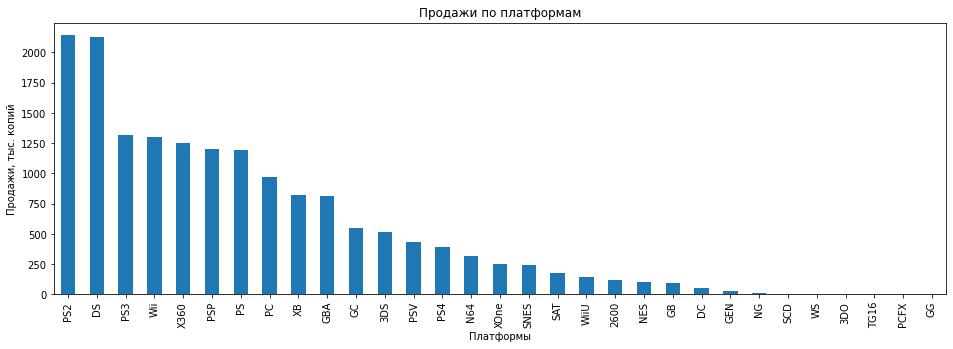

In [39]:
# построим столбчатую диаграмму top_platforms
top_platforms.plot(x = 'platform', kind = 'bar', figsize=(16,5));
plt.title('Продажи по платформам');
plt.xlabel('Платформы');
plt.ylabel('Продажи, тыс. копий');

PS2


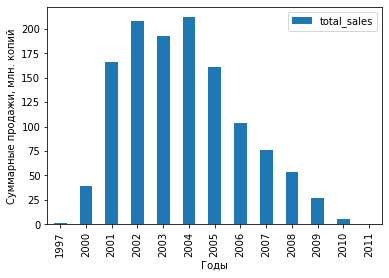

DS


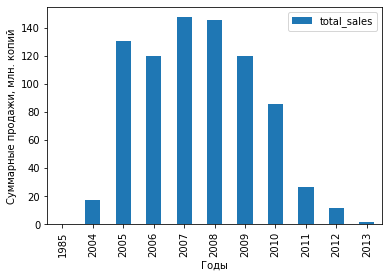

PS3


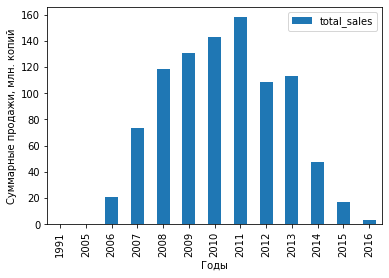

Wii


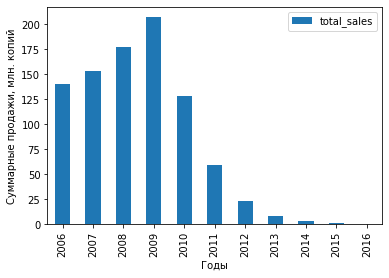

X360


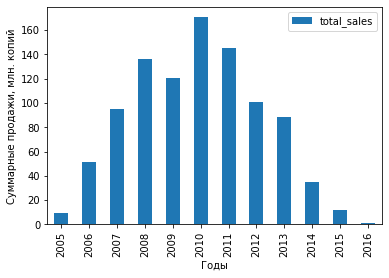

PSP


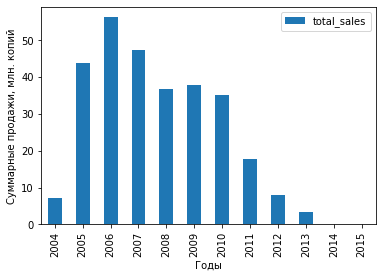

PS


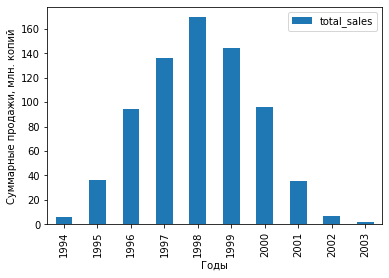

In [40]:
# объявим цикл для построения столбчатых диаграмм распределения продаж по годам для 7 самых популярных платформ
for platform in top_platforms.index[:7]:
    print(platform)
    (games
     .query('platform == @platform')
     .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
     .plot(kind = 'bar')
    )
    plt.xlabel('Годы');
    plt.ylabel('Суммарные продажи, млн. копий');
    plt.show()

- Платформа `PS2` (Playstation 2). Представленные годы продаж - 2000 - 2010 (10 лет). Успешные годы продаж - 2001 - 2005 (4 года)

- Платформа `DS` (Nintendo DS). Представленные годы продаж - 2004 - 2013 (9 лет). Успешные годы продаж - 2005 - 2010 (5 лет)

- Платформа `PS3` (Playstation 2). Представленные годы продаж - 2006 - 2016 (10 лет). Успешные годы продаж - 2008 - 2013 (5 лет)

- Платформа `Wii` (Nintendo Wii). Представленные годы продаж - 2006 - 2015 (9 лет). Успешные годы продаж - 2006 - 2010 (4 года)

- Платформа `X360` (XBox360). Представленные годы продаж - 2005 - 2016 (11 лет). Успешные годы продаж - 2008 - 2012 (4 года)

- Платформа `PSP` (Playstation Portable). Представленные годы продаж - 2004 - 2013 (9 лет). Успешные годы продаж - 2005 - 2010 (5 лет)

- Платформа `PS` (Playstation). Представленные годы продаж - 1994 - 2003 (9 лет). Успешные годы продаж - 1996 - 2000 (4 года)

Таким образом, полный жизненный цикл платформ составляет приблизительно `9 лет`, а жизненный цикл успешных продаж для игровых платформ составляет приблизительно `4 года`.

На графиках можно видеть аномалии для следующих консоли DS. Согласно википедии Nintendo DS была выпущена в 2004 году. Однако в датафрейме существуют игры с годом выхода 1985.

In [41]:
games.query('platform == "DS" & year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,n/a,0.02


Удалим аномалию

In [42]:
games = games.drop(index=[15957]).reset_index(drop=True)

##### Актуальный период для исследования

Для анализа рынка компьютерных игр возьмем период, начиная с 2014 года. Не забываем, что данные за 2016 год - неполные.

In [43]:
# объявим новую переменную, содержащую выгрузку оригинального датафрейма за период с 2013 по 2016 годы
games_actual = games.query('2014 <= year_of_release')

##### Показатели продаж игр на различных платформах за актуальный период

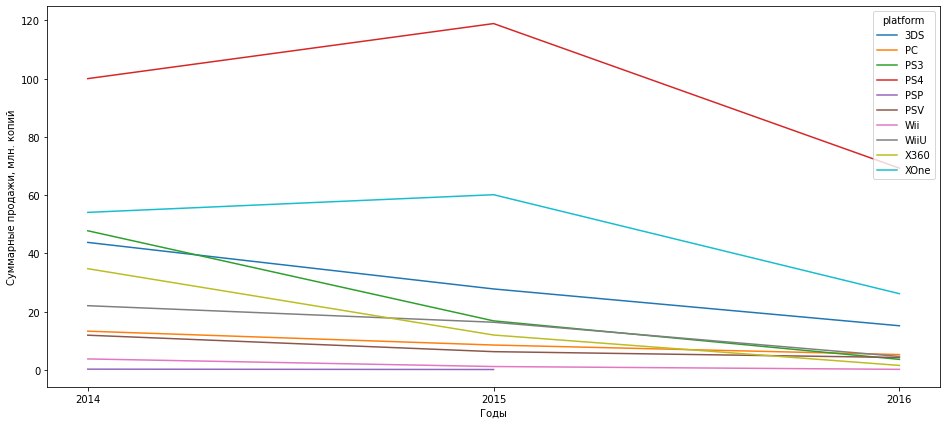

In [44]:
games_actual.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
            .plot(figsize=(16, 7));
plt.xlabel('Годы');
plt.xticks(ticks=[2014, 2015, 2016])
plt.ylabel('Суммарные продажи, млн. копий');

Визуальный анализ графика говорит о следующем:

- продажи игр практически на всех платформах за 2015 год ниже, чем за 2014г., рост показали только `PS4` и `XOne`

- продажи игр на всех платформах за 2016 год неполные, однако, можно ожидать рост по сравнению с 2014-2015гг по наиболее актуальным платформам

- больше всего продаж игр приходится на платформы `PS4` и `XOne` (консоли новго поколения)

- не смотря на окончание жизненного цикла, платформа `3DS` все еще показывает большие объемы продаж

- наиболее стабильная динамика продаж приходится на `PC` (уровень падания от года к году минимален)

- остальные платформы видятся малоперспективными, не стоит ожидать каких-либо позитивных изменений в динамике продаж в виду окончания жизненного цикла этих платформ

Таким образом, для дальнейшего анализа как наиболее перспективные возьмем следующие игровые платформы - `PS4, XOne, 3DS, PC`

In [45]:
# объявляем переменную games_actual_top, содержащую информацию о продажах за 2013-2016гг потенциально прибыльных платформ
games_actual_top = games_actual.query('platform in ["PS4", "XOne", "3DS", "PC"]')

#####  «Ящик с усами» по глобальным продажам игр

In [46]:
# построим "ящик с усами"
#games_actual.pivot_table(index = 'name', columns = 'platform', values = 'total_sales')\
#                .plot(kind='box', figsize=(16, 10), ylim=(0,15));
#plt.ylabel('Продажи, млн.копий');
#plt.xlabel('Платформы');

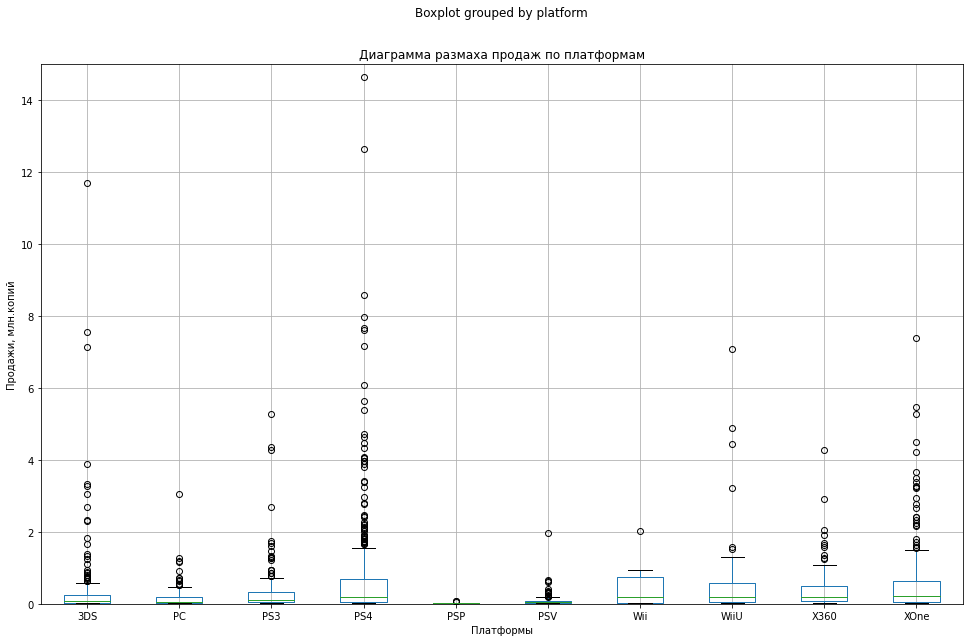

In [47]:
# построим "ящик с усами"
games_actual.boxplot(column = 'total_sales', by = 'platform', figsize=(16, 10));
plt.ylabel('Продажи, млн.копий');
plt.xlabel('Платформы');
plt.ylim(0, 15);
plt.title('Диаграмма размаха продаж по платформам');

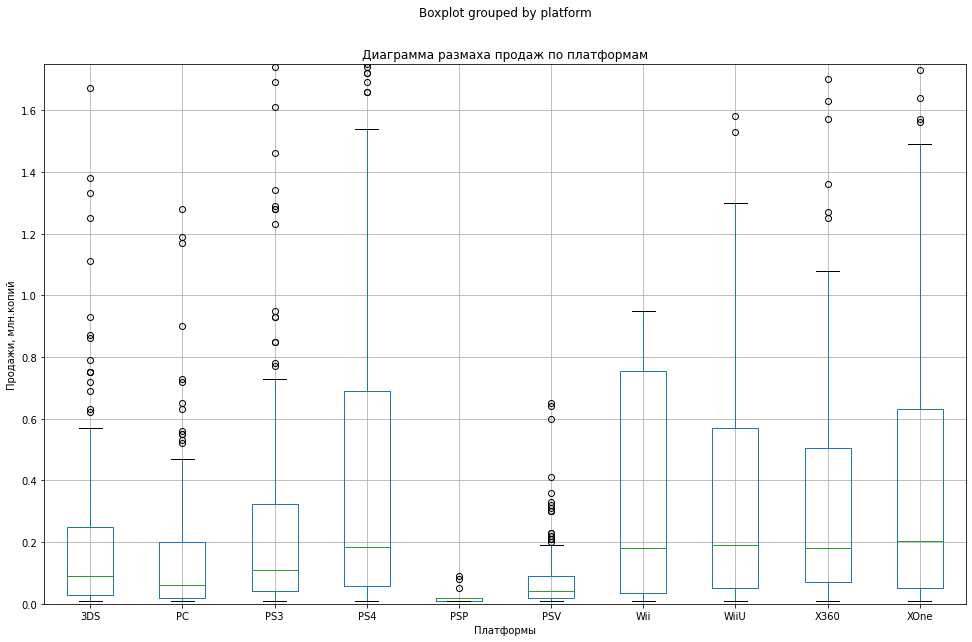

In [49]:
# построим "ящик с усами"
games_actual.boxplot(column = 'total_sales', by = 'platform', figsize=(16, 10));
plt.ylabel('Продажи, млн.копий');
plt.xlabel('Платформы');
plt.ylim(0, 1.75);
plt.title('Диаграмма размаха продаж по платформам');

Медиана продаж игр у двух наиболее перспективных платформ (`PS4` и `XOne`) находится приблизительно на одном уровне - 200 тыс.копий. Стоит отметить, что у платформ `Wii` `WiiU` 3 квартиль продаж по играм находится на сопоставимых уровнях, однако, количесвто игры, выпущенных на эти платформы - значительно меньше. Стоит отметить хорошие показатели продаж `PS3` и `X360`, но это консоли "отмирающие" и не стоит ожидать какого-либо роста продаж игр для них. Самой перспективной остается `PS4` - у нее присутсвуют "выброс" в 14 млн.копий за игру (кстати как и у менее перспективной `3DS`).

#####  Влияние на продажи отзывов пользователей и критиков.

######  PS4

Для оценки влияния отзывов критиков и пользователей на продажи игр возьмем самую популярную платформу - PS4.

Объявим переменную scatter_map_list для дальнейешго рассчета коэффициента корреляции

In [50]:
scatter_map_list = (['total_sales','critic_score','user_score'])

In [52]:
games_actual.query('platform in ["PS4"]')[scatter_map_list].corr().round(2)  

,total_sales,critic_score,user_score
total_sales,1.00,0.40,-0.04
critic_score,0.40,1.00,0.55
user_score,-0.04,0.55,1.00


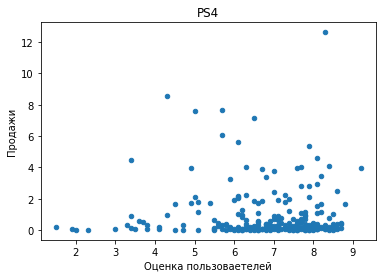

In [53]:
# построим матрицу рассеивания коореляции между суммарными продажами и оценкой пользователй
games_actual[games_actual['platform'] == 'PS4']\
            .plot(x='user_score', y='total_sales', kind='scatter');
plt.title('PS4')
plt.xlabel('Оценка пользоваетелей');
plt.ylabel('Продажи');

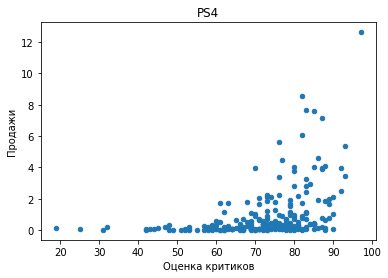

In [54]:
# построим матрицу рассеивания коореляции между суммарными продажами и оценкой критиков
games_actual[games_actual['platform'] == 'PS4']\
            .plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('PS4')
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи');

На основании анализа данных в отношении `PS4` можно утверждать следующее:

- существует прямая зависимость между оценкой критиков и оценкой пользователей (коэффициент корреляции 0.55)

- существует относительно слабая прямая зависимость между оценкой критиков и общими продажами (коэффициент корреляции 0.40)

- нельзя утверждать, что существует хоть какая-то зависимость между оценкой пользоваетелей и общими продажами (коэффициент корреляции -0.04)

Проверим сопостовимость коэффциентов корреляции для других наиболее перспективных платформ

######  XOne

In [55]:
games_actual.query('platform in ["XOne"]')[scatter_map_list].corr().round(2)

,total_sales,critic_score,user_score
total_sales,1.00,0.43,-0.07
critic_score,0.43,1.00,0.44
user_score,-0.07,0.44,1.00


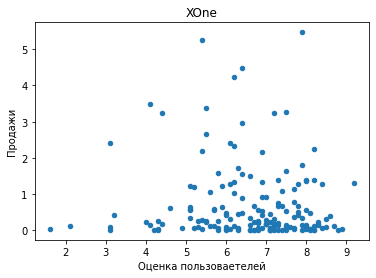

In [56]:
# построим матрицу рассеивания коореляци между суммарными продажами и оценкой пользователй
games_actual[games_actual['platform'] == 'XOne']\
            .plot(x='user_score', y='total_sales', kind='scatter');
plt.title('XOne')
plt.xlabel('Оценка пользоваетелей');
plt.ylabel('Продажи');

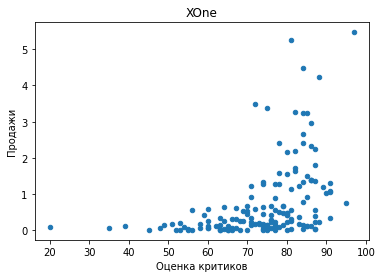

In [57]:
# построим матрицу рассеивания коореляции между суммарными продажами и оценкой критиков
games_actual[games_actual['platform'] == 'XOne']\
            .plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('XOne')
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи');

Для `XOne` коэффициенты корреляции сопоставимы с коэффициентами для `PS4`:

- зависимость между оценкой критиков и оценкой пользователей чуть менее выражена (коэффициент корреляции 0.44 против 0.55)

- зависимость между оценкой критиков и общими продажами приблизительная такая же (коэффициент корреляции 0.43 против 0.40)

- зависимость между оценкой пользоваетелей и общими продажами отсутсвует (коэффициент корреляции -0.07 против -0.04)

######  PC

In [58]:
games_actual.query('platform in ["PC"]')[scatter_map_list].corr().round(2) 

,total_sales,critic_score,user_score
total_sales,1.00,0.17,-0.07
critic_score,0.17,1.00,0.47
user_score,-0.07,0.47,1.00


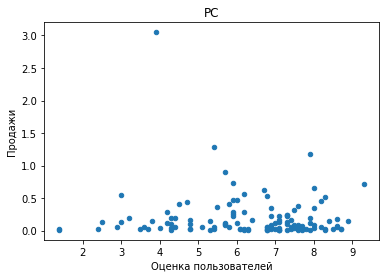

In [59]:
# построим матрицу рассеивания коореляции между суммарными продажами и оценкой пользователй
games_actual[games_actual['platform'] == 'PC']\
            .plot(x='user_score', y='total_sales', kind='scatter');
plt.title('PC')
plt.xlabel('Оценка пользователей');
plt.ylabel('Продажи');

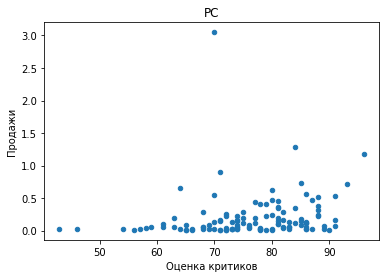

In [60]:
# построим матрицу рассеивания коореляции между суммарными продажами и оценкой критиков
games_actual[games_actual['platform'] == 'PC']\
            .plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('PC')
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи');

Для `PC` коэффициенты корреляции отличаются значительно сильнее от коэффициентов для `PS4`:

- зависимость между оценкой критиков и оценкой пользователей чуть менее выражена (коэффициент корреляции 0.47 против 0.55)

- зависимость между оценкой критиков и общими продажами значительно ниже (коэффициент корреляции 0.17 против 0.40)

- зависимость между оценкой пользоваетелей и общими продажами отсутсвует (коэффициент корреляции -0.07 против -0.04)

######  3DS

In [61]:
games_actual.query('platform in ["3DS"]')[scatter_map_list].corr().round(2) 

,total_sales,critic_score,user_score
total_sales,1.00,0.31,0.22
critic_score,0.31,1.00,0.86
user_score,0.22,0.86,1.00


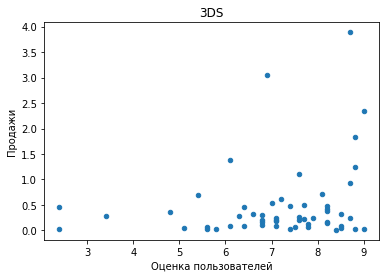

In [62]:
# построим матрицу рассеивания коореляции между суммарными продажами и оценкой пользователй
games_actual[games_actual['platform'] == '3DS']\
            .plot(x='user_score', y='total_sales', kind='scatter');
plt.title('3DS')
plt.xlabel('Оценка пользователей');
plt.ylabel('Продажи');

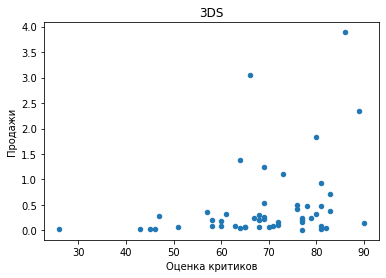

In [63]:
# построим матрицу рассеивания коореляциb между суммарными продажами и оценкой критиков
games_actual[games_actual['platform'] == '3DS']\
            .plot(x='critic_score', y='total_sales', kind='scatter');
plt.title('3DS')
plt.xlabel('Оценка критиков');
plt.ylabel('Продажи');

Для `3DS` коэффициенты корреляции так же сильно отличаются от коэффициентов для `PS4`:

- зависимость между оценкой критиков и оценкой пользователей значительно сильнее (коэффициент корреляции 0.86 против 0.55)

- зависимость между оценкой критиков и общими продажами чуть меньше (коэффициент корреляции 0.31 против 0.40)

- пристусвует небольшая прямая зависимость между оценкой пользоваетелей и общими продажами (коэффициент корреляции 0.22 против -0.04)

**Таким образом, в отношении наиболее перспективных игровых платформ можно утверждать следующее:**

- существует небольшая зависимость между оценкой критиков и оценкой пользователей. Оно понятно, критики - то же люди, очевидно наличие схожих тендеций в мнениях пользоваетелй и критиков

- сущетсвует чуть менее выраженная заивисмость между оценкой критиков и общими продажами. Однако нельзя утверждать, что высокие оценки критиков оказывает влияние на суммарные продажи игр. Скорее, положительные оценки критиков являются следствием успешных игр

- зависимость между оценкой пользоваетелей и общими продажами практически отсуствует. Мнение пользовтаелей никак не влияет на продажи игры.

#####  Распределение игр по жанрам

Посмотрим, как рапсределны жанры по количеству представленных игр

In [64]:
games_actual.groupby('genre')['name'].count().sort_values(ascending = False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

Выведем список жанров с информацией о суммарных продажах 

In [65]:

games_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Построим "пирожковую" диаграмму по суммарным продажам игр в каждом жанре

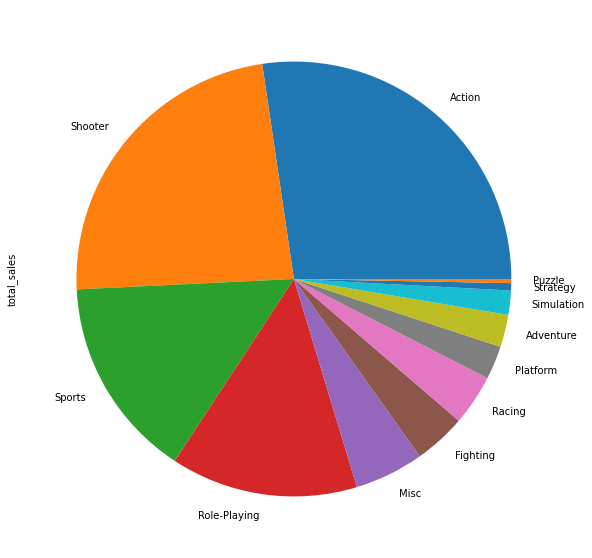

In [66]:
games_actual.groupby('genre')['total_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(10,10));

Построим диаграмму размаха по единичным продажам игр в разных жанрах

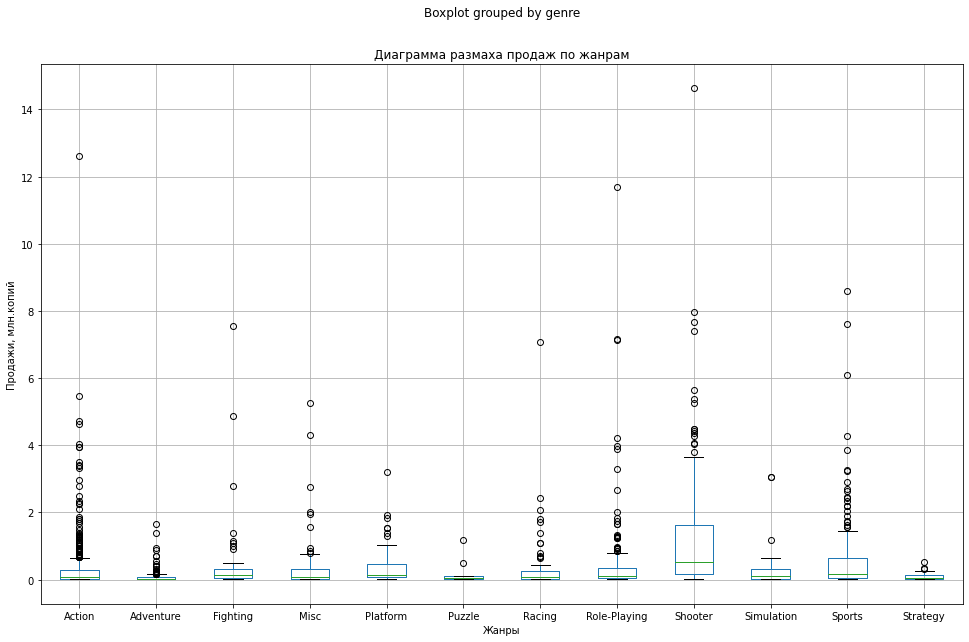

In [68]:
games_actual.boxplot(column = 'total_sales', by = 'genre', figsize=(16, 10));
plt.ylabel('Продажи, млн.копий');
plt.xlabel('Жанры');
plt.title('Диаграмма размаха продаж по жанрам');

Построим диаграмму размаха поближе

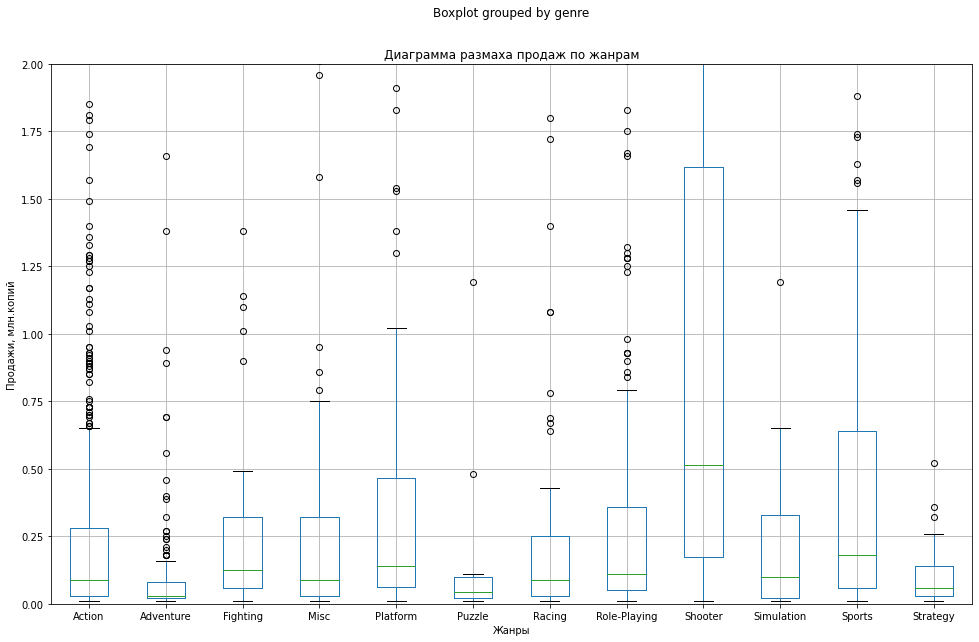

In [70]:
# построим "ящик с усами"
games_actual.boxplot(column = 'total_sales', by = 'genre', figsize=(16, 10));
plt.ylabel('Продажи, млн.копий');
plt.xlabel('Жанры');
plt.ylim(0, 2);
plt.title('Диаграмма размаха продаж по жанрам');

Промежуточные выводы:
    
- Самые популярные жанры - `Action` и `Shooter` (на них приходится половина всех суммарных продаж рынка). При этом медиана значений для игр жанра `Action` - менее 100тыс., жанр берет количеством игр. в жанре `Shooter` медиана находится на уровне приблизительно пол милиона копий, что является абсолютным рекордом

-  3 место по суммарным продажам рынка занимют игры в жанре `Sports`. При этом медиана их продаж занимает второе место среди всех жанров (около 200 тыс.копий).

- игры в жанре `Platform` - успешные сами по себе (3 квартиль - на уровне 450 тыс.копий), однако таких игр не много, что не позволяет отнести жанр даже в топ-5 суммарных продаж

#### Составьте портрет пользователя каждого региона

##### Самые популярные платформы (топ-5)

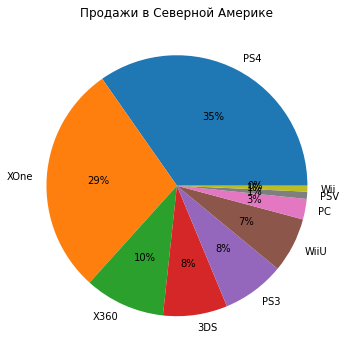

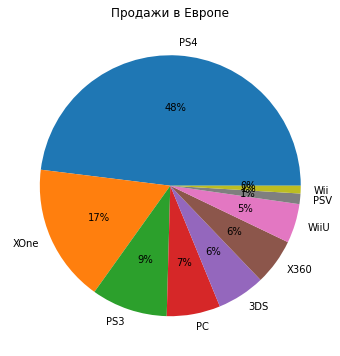

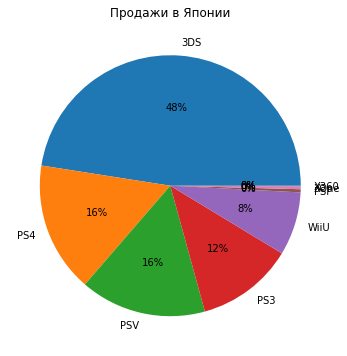

In [71]:
plt.figure(0)
games_actual.groupby('platform')['na_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Северной Америке');
plt.ylabel('');
plt.figure(1)
games_actual.groupby('platform')['eu_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Европе');
plt.ylabel('');
plt.figure(2)
games_actual.groupby('platform')['jp_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Японии');
plt.ylabel('');
plt.show() 

**ТОП-5 платформ в Северной Америке:**

1) PS4 (35% рынка)

2) XOne (29% рынка)

3) X360 (10% рынка)

4) 3DS (8% рынка)

5) PS3 (8% рынка)


**ТОП-5 платформ в Европе:**

1) PS4 (48% рынка)

2) XOne (17% рынка)

3) PS3 (9% рынка)

4) PC (7% рынка)

5) 3DS (6% рынка)

**ТОП-5 платформ в Японии:**

1) 3DS (48% рынка)

2) PS4 (16% рынка)

3) PSV (16% рынка)

4) PS3 (12% рынка)

5) WiiU (8% рынка)

Таким образом, в Европе и в Северной Америке самыми популярными консолями оказались консоли последнего поколения `PS4` (первое место) и `XOne` (второе место). Однако в Северной Америке все еще популярна консоль `X360` американской корпорации Microsoft, в то время, как в Европе больше играют на `PS3`. Стоит так же отметить, что платформа `PC` относительно популярна только в Европе. Рынок Японии довольно сильно отличается. Так, самыми популярными консолями стали портативные `3DS` и `PSV`.

In [73]:
# check
# import pandas as pd
df_app = pd.DataFrame([['ps',1,2,3],
                   ['xone',3,5,6],
                   ['pc',8,9,10],
                   ['ps3',1,7,3],
                   ['ps4',5,2,3]], columns=['platform', 'eu','jp','na'])
display(df_app)

df_other = df_app[3:]
df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),
                  'jp': df_app['jp'].sum()-df_app['jp'][3:].sum(),
                  'na': df_app['na'].sum()-df_app['na'][3:].sum()}, ignore_index = True)
df_other

,platform,eu,jp,na
0,ps,1,2,3
1,xone,3,5,6
2,pc,8,9,10
3,ps3,1,7,3
4,ps4,5,2,3


,platform,eu,jp,na
0,ps3,1,7,3
1,ps4,5,2,3
2,Other,12,16,19


##### check

In [74]:
# Создаем таблицу ТОП-5 платформ для региона Северная Америка + объединение других жанров на 6ю строчку чарта

top_platforms_na = games_actual.groupby('platform')\
                               .agg({'na_sales': 'sum'})\
                               .sort_values(by='na_sales', ascending=False)\
                               .reset_index()
top_platforms_na_other = top_platforms_na[:5]
top_platforms_na_other = top_platforms_na_other.append({'platform': 'Other',\
                                                          'na_sales': top_platforms_na['na_sales'][5:].sum()},\
                                                         ignore_index = True)
top_platforms_na_other

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Other,31.19


In [75]:
# Создаем таблицу ТОП-5 платформ для региона Европа + объединение других жанров на 6ю строчку чарта

top_platforms_eu = games_actual.groupby('platform')\
                               .agg({'eu_sales': 'sum'})\
                               .sort_values(by='eu_sales', ascending=False)\
                               .reset_index()
top_platforms_eu_other = top_platforms_eu[:5]
top_platforms_eu_other = top_platforms_eu_other.append({'platform': 'Other',\
                                                          'eu_sales': top_platforms_eu['eu_sales'][5:].sum()},\
                                                         ignore_index = True)
top_platforms_eu_other

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Other,34.76


In [76]:
# Создаем таблицу ТОП-5 платформ для региона Япония + объединение других жанров на 6ю строчку чарта

top_platforms_jp = games_actual.groupby('platform')\
                               .agg({'jp_sales': 'sum'})\
                               .sort_values(by='jp_sales', ascending=False)\
                               .reset_index()
top_platforms_jp_other = top_platforms_jp[:5]
top_platforms_jp_other = top_platforms_jp_other.append({'platform': 'Other',\
                                                          'jp_sales': top_platforms_jp['jp_sales'][5:].sum()},\
                                                         ignore_index = True)
top_platforms_jp_other

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Other,0.76


##### Самые популярные жанры (топ-5)

In [77]:
# Создаем таблицу ТОП-5 жанров для региона Северная Америка + объединение других жанров на 6ю строчку чарта

top_genres_na = games_actual.groupby('genre')\
                            .agg({'na_sales': 'sum'})\
                            .sort_values(by='na_sales', ascending=False)\
                            .reset_index()
top_genres_na_other = top_genres_na[:5]
top_genres_na_other = top_genres_na_other.append({'genre': 'Other',\
                                                          'na_sales': top_genres_na['na_sales'][5:].sum()},\
                                                         ignore_index = True)
top_genres_na_other

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Other,37.86


In [78]:
# Создаем таблицу ТОП-5 жанров для региона Европа + объединение других жанров на 6ю строчку чарта

top_genres_eu = games_actual.groupby('genre')\
                            .agg({'eu_sales': 'sum'})\
                            .sort_values(by='eu_sales', ascending=False)\
                            .reset_index()
top_genres_eu_other = top_genres_eu[:5]
top_genres_eu_other = top_genres_eu_other.append({'genre': 'Other',\
                                                          'eu_sales': top_genres_eu['eu_sales'][5:].sum()},\
                                                         ignore_index = True)
top_genres_eu_other

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Other,42.45


In [79]:
# Создаем таблицу ТОП-5 жанров для региона Япония + объединение других жанров на 6ю строчку чарта

top_genres_jp = games_actual.groupby('genre')\
                            .agg({'jp_sales': 'sum'})\
                            .sort_values(by='jp_sales', ascending=False)\
                            .reset_index()
top_genres_jp_other = top_genres_jp[:5]
top_genres_jp_other = top_genres_jp_other.append({'genre': 'Other',\
                                                          'jp_sales': top_genres_jp['jp_sales'][5:].sum()},\
                                                         ignore_index = True)
top_genres_jp_other

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Other,15.50


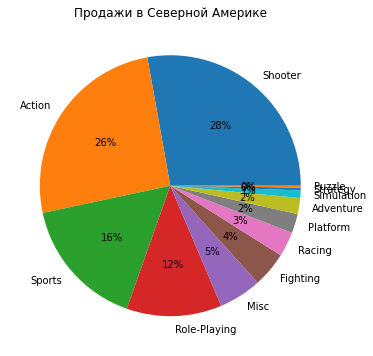

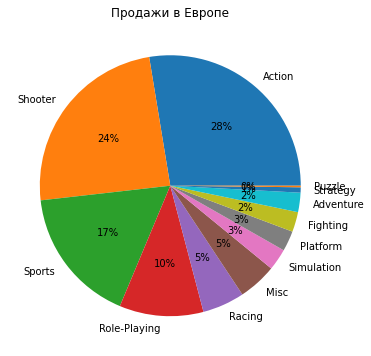

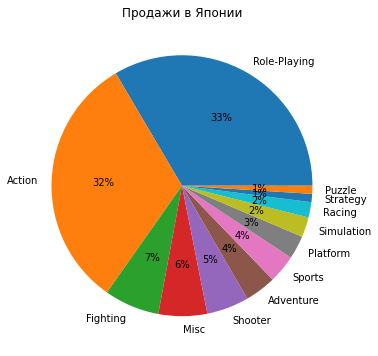

In [80]:
plt.figure(0)
games_actual.groupby('genre')['na_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Северной Америке');
plt.ylabel('');
plt.figure(1)
games_actual.groupby('genre')['eu_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Европе');
plt.ylabel('');
plt.figure(2)
games_actual.groupby('genre')['jp_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Японии');
plt.ylabel('');
plt.show() 

**ТОП-5 жанров в Северной Америке:**

1) Shooter (28% рынка)

2) Action (26% рынка)

3) Sports (16% рынка)

4) Role-Playing (12% рынка)

5) Misc (5% рынка)


**ТОП-5 жанров в Европе:**

1) Action (28% рынка)

2) Shooter (24% рынка)

3) Sports (17% рынка)

4) Role-Playing (10% рынка)

5) Racing (5% рынка)

**ТОП-5 жанров в Японии:**

1) Role-Playing (33% рынка)

2) Action (32% рынка)

3) Fighting (7% рынка)

4) Misc (7% рынка)

5) Shooter (5% рынка)

Рынок Северной Америки практически идентичен рынку Европы: первая четверка игровых жанров - `Action`, `Shooter`, `Sports`, `Role-Playing`. Существуют лишь небольшие различия в объемах рынков. Так, в Северной Америке продается больше игры в жанре `Shooter`, а в Европе - `Action`. Япония опять показывает большие отличия от западных рынков. Так, самый популярный жанр -  `Role-Playing`, второе место - `Action`. Интересно отметить, что продажи по всем остальным жанрам находятся приблизительно на одном уровне.

#####  Влияние рейтинга ESRB на продажи в отдельном регионе

Ранее в **п.2.3.6** настоящего исследования нами был категорально переработан столбец `rating` (рейтинги были объеденены в более понятные возрастные группы).

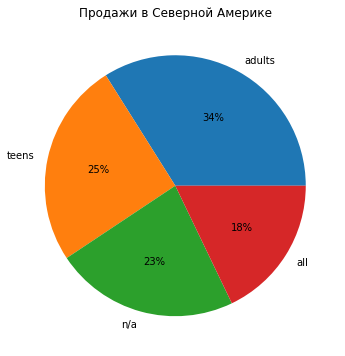

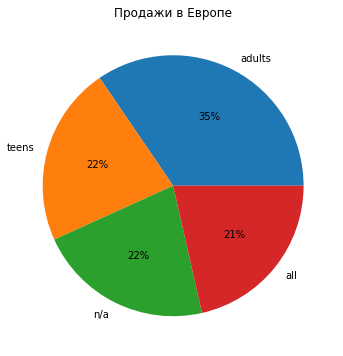

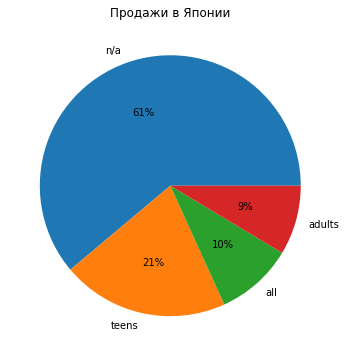

In [81]:
plt.figure(0)
games_actual.groupby('rating')['na_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Северной Америке');
plt.ylabel('');
plt.figure(1)
games_actual.groupby('rating')['eu_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Европе');
plt.ylabel('');
plt.figure(2)
games_actual.groupby('rating')['jp_sales'].sum()\
            .sort_values(ascending = False)\
            .plot(kind = 'pie', figsize=(15, 6), autopct='%1.0f%%');
plt.title('Продажи в Японии');
plt.ylabel('');
plt.show() 

Примечательно, что ранее нами так же была выделена категория `kids`, но в выборку за актуальный период не вошло ни одной игры из этой категории

**ТОП-4 возрастных рейтинга в Северной Америке:**

1) Adults (34% рынка)

2) Teens (25% рынка)

3) N/a (23% рынка)

4) All (18% рынка)


**ТОП-4 возрастных рейтинга в Европе:**

1) Adults (35% рынка)

2) Teens (22% рынка)

3) N/a (22% рынка)

4) All (21% рынка)

**ТОП-4 возрастных рейтинга в Японии:**

1) N/a (61% рынка)

2) Teens (21% рынка)

3) All (10% рынка)

4) Adults (9% рынка)


В Северной Америке и Европе больше всего игр с возрастным рейтингом `Adults`. Оно и понятно, ранее мы выяснили, что самые популярные жанры - `Action` и `Shooter` (такие игры содержат больше сцен насилия). В Японии же самым популярным рейтингом оказался `N/a`: ESRB - организация с территорией действия США и Канада, поэтому далеко не всем играм из Японии присваевается ее рейтинг. Однако, самым популярным из присвоенных возрастных рейтингов о казался `Teens` - как раз этот рейтинг присуждают популярной разновидности `Role-Playing` игры в Японии - `JRPG`. Стоит так же отметить, что самый популярный возрастной рейтингв Северной Америке и Европе - `Adults` - оказался наименее популярным в Японии.

<div class="alert alert-war ning", style="borde r:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br />        
        
При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах
        
Стоит поработать со столбцом рейтингов, заменить пропуски, посмотреть на частотность использования всех категорий рейтинга
        

        
        Стоит так же отметить, что ESRB - организация с территорией действия США и Канада, поэтому далеко не всем играм из Японии присваевается ее рейтинг.        
        
Все верно, стоит это показать на графиках        

Таким образом, мы получили портрет игроков из разных регионов:

- `Северная Америка` - больше всего играют на приставках `PS4`, `XOne` и `X360` в игры жанра `Action` и `Shooter` с возрастным рейтингом `Adult`

- `Европая` - больше всего играют на приставках `PS4`, `PS3` и `XOne` в игры жанра `Action` и `Shooter` с возрастным рейтингом `Adult`

- `Япония` - больше всего играют на портативных приставках `3DS` и `PSV`, а так же консолях старого поколения `PS3` в игры жанра `Role-Playing` (`JRPG`) и `Action` с возрастным рейтингом `Teen`

#### Проверка гипотез

##### ГИПОТЕЗА 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0 - Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1 - Алтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются

Зададим уровень статистической значимости alpha - 5% (0.05)

In [82]:
# избавимся от данных без оценки пользователей
games_actual_score = games_actual.dropna(subset=['user_score']).reset_index(drop = True)

In [83]:
# объявим новые переменные, содержащие информацию об оценках пользователей для разных платформ
PC = games_actual_score.query('platform == "PC"')['user_score']
XOne = games_actual_score.query('platform == "XOne"')['user_score']

In [84]:
# Проверим, на сколько сильно отличаются дисперсии по разным платформам
print('Дисперсия PC =', np.var(PC))
print('Дисперсия XOne =', np.var(XOne))

Дисперсия PC = 2.8773743617307175
Дисперсия XOne = 1.8795460055096425


Посколько дисперсия незначительно отличается, параметр equal_var = True при выозве функции st.ttest_ind задается по умолчанию

In [85]:
alpha = 0.05

results = st.ttest_ind(PC, XOne)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Таким образом, на основе имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу (средние пользовательские рейтинги платформ Xbox One и PC одинаковые) в пользу альтернативной гипотезы (средние пользовательские рейтинги платформ Xbox One и PC различаются).

In [86]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


##### ГИПОТЕЗА 2. Средние пользовательские рейтинги жанров Action  и Sports разные.

Н0 - Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1 - Алтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различаются

Зададим уровень статистической значимости alpha - 5% (0.05)

In [87]:
# объявим новые переменные, содержащие информацию об оценках пользователей для разных платформ
Action = games_actual_score.query('genre == "Action"')['user_score']
Sports = games_actual_score.query('genre == "Sports"')['user_score']

In [88]:
# Проверим, на сколько сильно отличаются дисперсии по разным платформам
print('Дисперсия Action =', np.var(Action))
print('Дисперсия Sports =', np.var(Sports))

Дисперсия Action = 1.89208448117539
Дисперсия Sports = 3.4198375596751185


Посколько дисперсия незначительно отличается, параметр equal_var = True при выозве функции st.ttest_ind задается по умолчанию

In [89]:
alpha = 0.05

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: cредние пользовательские рейтинги жанров Action и Sports различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу: cредние пользовательские рейтинги жанров Action и Sports различаются


Таким образом, на основе имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу (средние пользовательские рейтинги жанров Action и Sports одинаковые) в пользу альтернативной гипотезы (cредние пользовательские рейтинги жанров Action и Sports различаются).

#### Выводы исследования

В ходе исследования данных о продажах компьютерных игр в интернет-магазине «Стримчик» был проведены следущие шаги, приведшие к нижеизложенным выводам:

**1) Был загружен датасет исходный датасет о продажах компьютерных игр для разных игровых платформ по всему миру**

**2) Была проведена предобработка данных:**

- названия столбцов приведены в "змеиный" регистр

- удалены строки с пропущенным значениями в столбцах `name`,  `genre`

- часть пропущенных значений из столбца `year_of_release` были восстановлены за счет информаации о выходе игр на других платформах, остальные строки были проверены на существенность и отброшены

- столбец `year_of_release` приведен к целочисленному формату

- добавлен столбец `total_sales`, содержащий информацию о суммарных продажах по всему миру

- столбец `rating` был переработан в новые агрегированные категоральные значения

- пропущенные значения столбцов `critic_score` и `user_score`  оставлены без изменения, т.к. заполнить их нечем, а удаление строк с пропущенными значениями не представляется возможным в виду большого объема данных

- в ходе предобработки данных было удалено 148 строк

**3) Был проведен иследовательский анализ данных:**

- датафрейм содержит игры, выпущенные с 1980 по 2016 годы. До 1995 было выпущено незначительное колиечство игры. Пик производства игр пришелся на период с 2006 по 2012 годы. В 2013 произошло рекзкое падание продаж игр и вплоть до 2016 года объем рынка практически не менялся. Стоит отметить, что продажи в 2016 году сопостовим по объему с продажими в другие годы пдаения. Однако, данные за 2016 - неполные. Таким образом, по результатм 2016 года следует ожидать рост рынка.

- был произведен анализ жизненного цикла игровых платформ, в ходе которого выяснилось, что полный жизненный цикл платформ составляет приблизительно 9 лет, а жизненный цикл успешных продаж для игровых платформ составляет приблизительно 4 года

- для дальнейшего анализа данных нами был взят актуальный период для исследования в 3 последние года (2014-2016г)

- анализ актуальных годов показал, наиболее перспективными игровыми платформами являются `PS4`, `XOne`, `3DS`, `PC`. При этом, на бОльшую часть рынка приходятся продажи игр на `PS4`, `XOne`

- нами были подтверждены следующие утверждения относительно корреляции продаж от отзывов критиков и игроков:

    - существует небольшая зависимость между оценкой критиков и оценкой пользователей.

    - сущетсвует чуть менее выраженная заивисмость между оценкой критиков и общими продажами. Однако нельзя утверждать, что высокие оценки критиков оказывает влияние на суммарные продажи игр.

    - зависимость между оценкой пользоваетелей и общими продажами практически отсуствует. Мнение пользовтаелей никак не влияет на продажи игры.

- было выяснено, что самые популярные жанры - `Action` и `Shooter` (на них приходится аж половина всех продаж). 3 место делят между собой игры в жанре `Sports` и `Role-Playing`. 

**4) Нами был описан портрет игроков из разных регионов:**

- `Северная Америка` - больше всего играют на приставках `PS4` и `XOne` в игры жанра `Action` и `Shooter` с возрастным рейтингом `Adult`

- `Европая` - больше всего играют на приставках `PS4` и `XOne` в игры жанра `Action` и `Shooter` с возрастным рейтингом `Adult`

- `Япония` - больше всего играют на портативных приставках `3DS` и `PSV` в игры жанра `Role-Playing` (`JRPG`) и `Action` с возрастным рейтингом `Teen`
    
**5) Проверены следующие гипотезы:**

- ГИПОТЕЗА 1. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. На уровне значимости 5% нет оснований отвергнуть нулевую гипотезу (средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые) в пользу альтернативной гипотезы (средние пользовательские рейтинги платформ `Xbox One` и `PC` различаются).

- ГИПОТЕЗА 2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные. На уровне значимости 5% есть основания отвергнуть нулевую гипотезу (средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые) в пользу альтернативной гипотезы (cредние пользовательские рейтинги жанров `Action` и `Sports` различаются).
    